**The goal** of the project is to retrieve all necessary information from the website containg data about the job offers.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup #for scraping
import requests
from urllib.request import urlopen

In [73]:
#the link to the first page
page_number = 1
url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=python&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=python&pDate=I&sequence={page_number}&startPage=1'
print(url)

https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=python&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=python&pDate=I&sequence=1&startPage=1


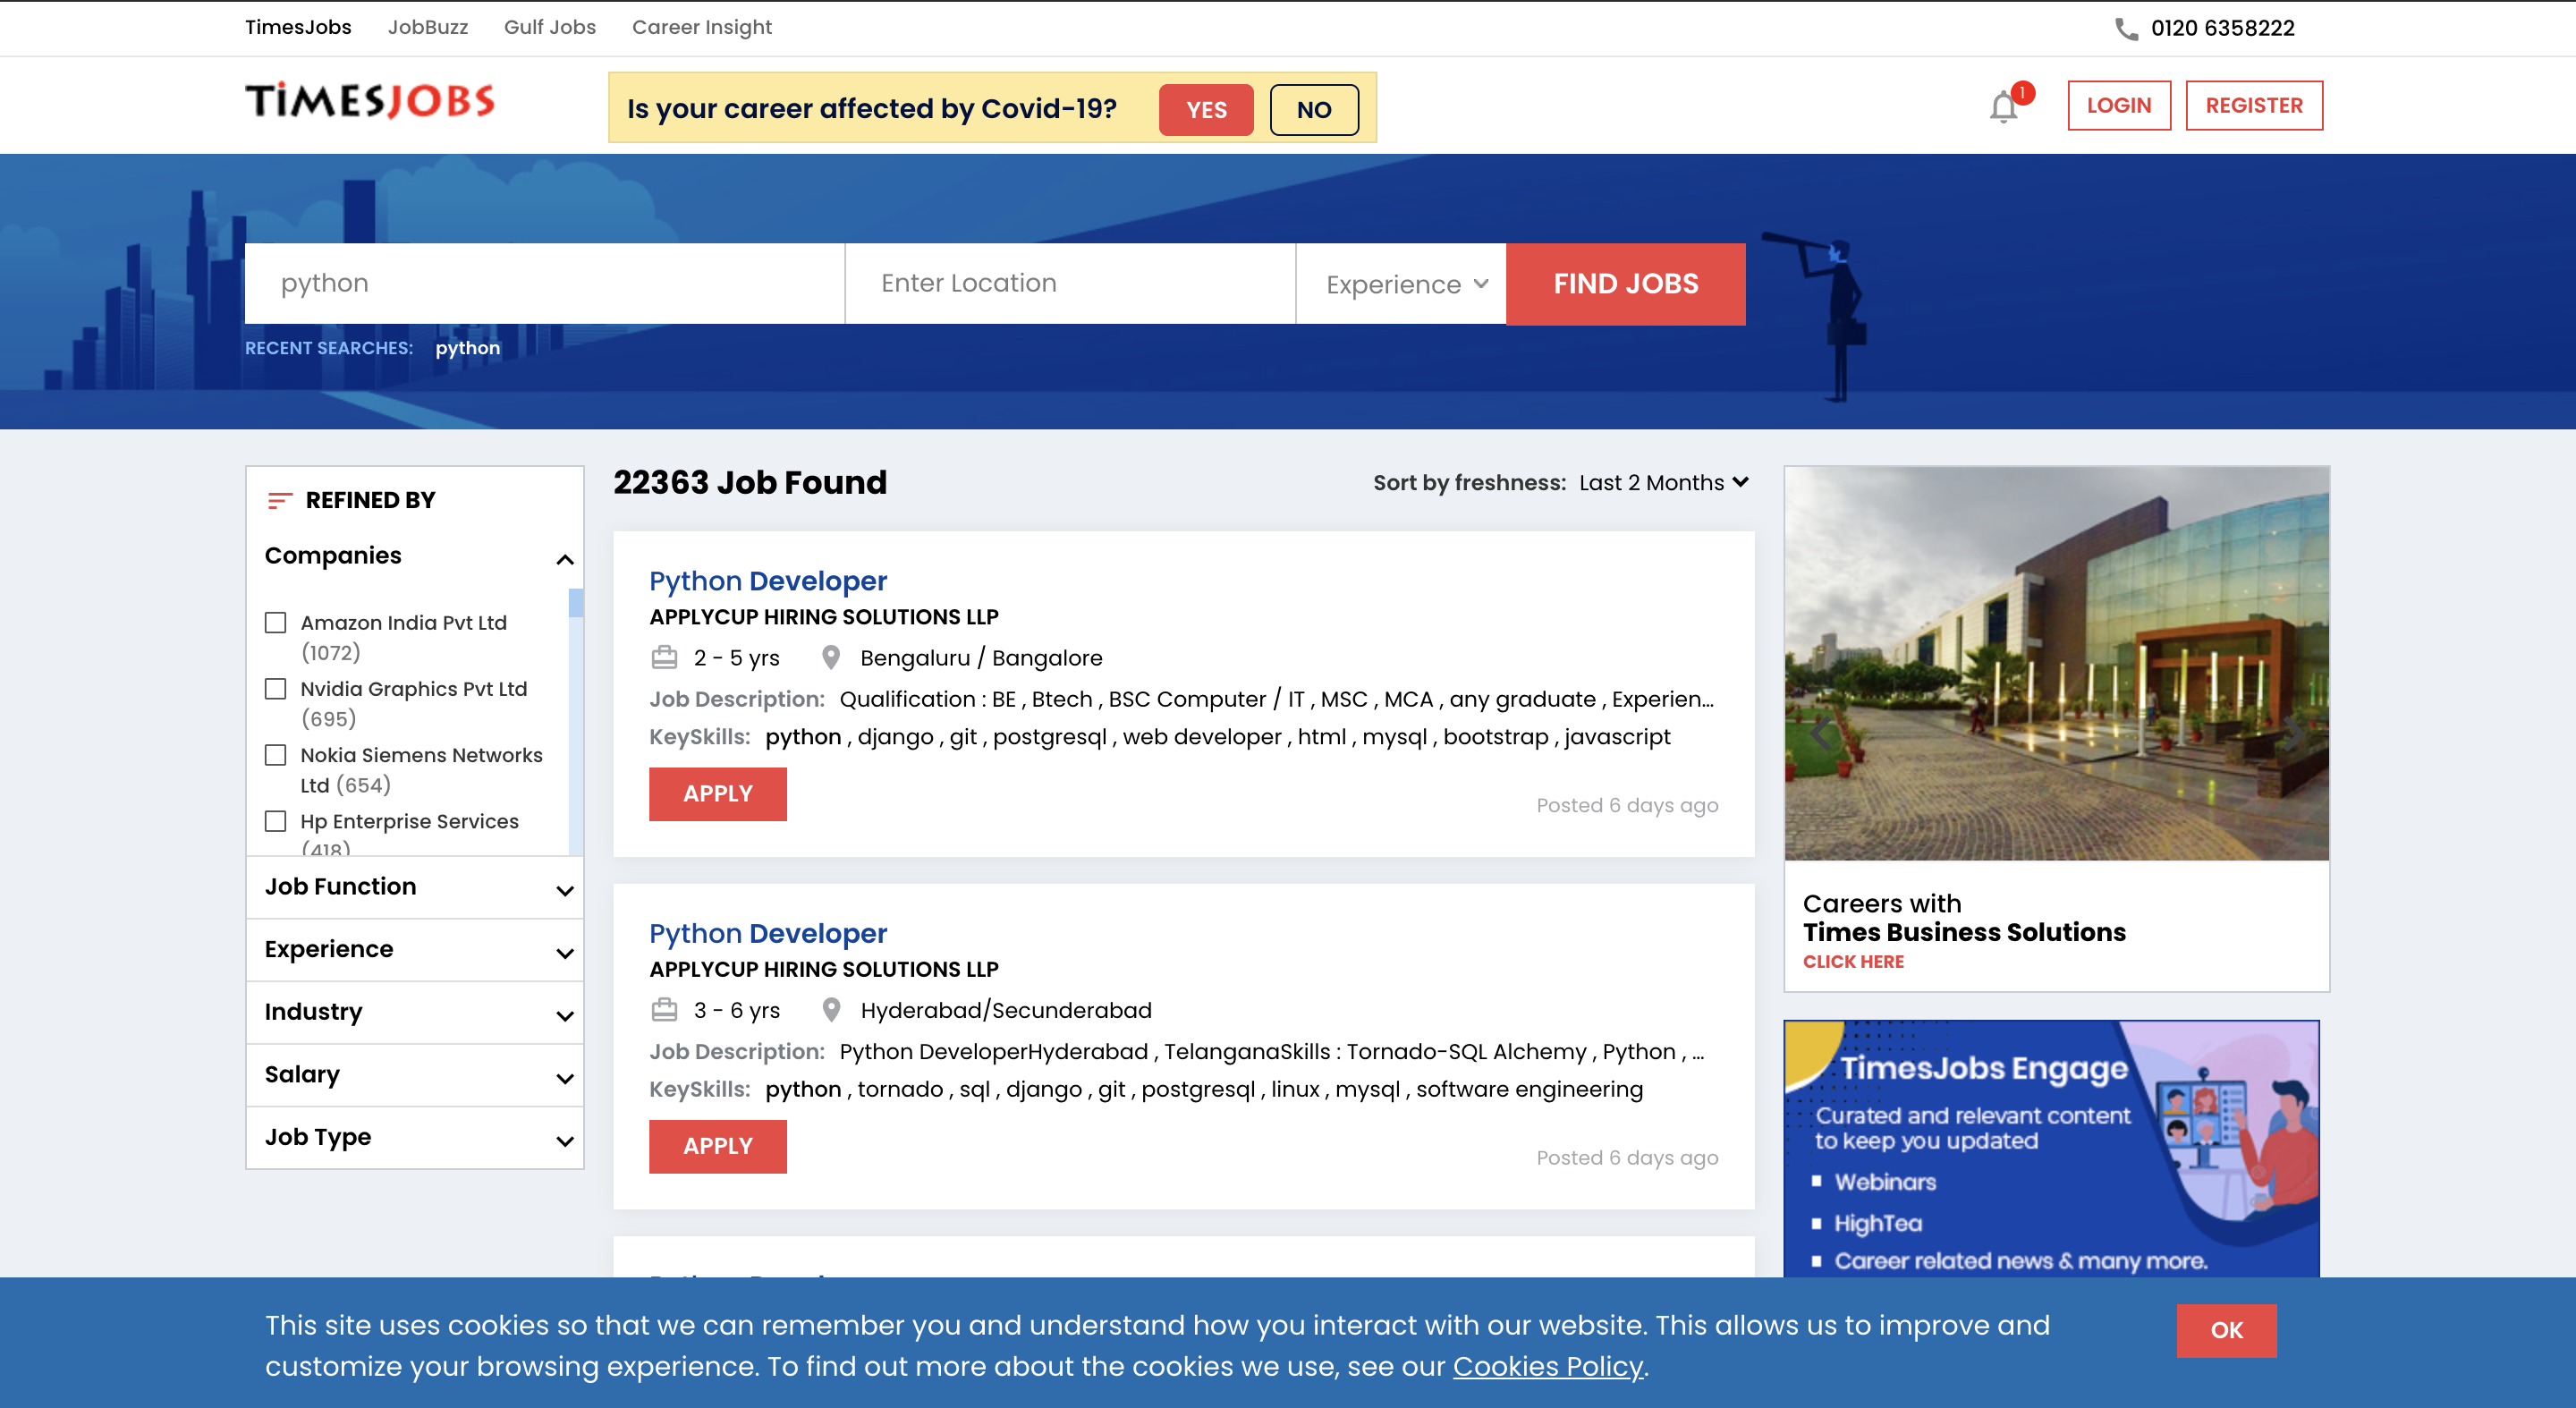

We will extract the following information: the title of the job, hiring company, experience needed, location of the job, its description and necessary skills.

## Single webpage scraping

Firstly, we are gonna scrape single(first) web page to see whether it performs fine.

In [75]:
html = requests.get(url)
soup = BeautifulSoup(html.content, 'lxml')

In [76]:
#creating empty lists for each column
job_titles = []
companies = []
experience = []
location = []
description = []
skills = []

In [77]:
for a in soup.find_all('li', class_ = 'clearfix job-bx wht-shd-bx'): #for each item in list of jobs
    job_title = a.strong.text #extracting the title
    company = a.h3.text #the company's name
    exp_loc_info = a.find('ul', class_ = 'top-jd-dtl clearfix')
    exp = exp_loc_info.find('li').text.replace('card_travel', '') #experience
    loc = exp_loc_info.find('span').text.replace(" ", '') #location
    desc_skills = a.find('ul', class_ = 'list-job-dtl clearfix')
    desc = desc_skills.find('li').text.replace('More Details', '') # description
    skill = desc_skills.find('span', class_ = 'srp-skills').text.replace(' ', '') #skills
    
    #appending the values to corresponding list
    job_titles.append(job_title)
    companies.append(company)
    experience.append(exp)
    location.append(loc)
    description.append(desc)
    skills.append(skill)
    

In [78]:
#creating the dataset
df = pd.DataFrame({'job_title' : job_titles,
             'company' : companies,
             'experience' : experience,
             'location' : location,
             'description' : description,
             'skills_required' : skills})

df.head()

,job_title,company,experience,location,description,skills_required
0,Python,\r\n Pure Tech Codex Private Limited\r\n ...,2 - 3 yrs,Pune,\nJob Description:\r\nJob Description: 2 to 3 ...,"\r\n\r\nrest,python,database,django,debugging,..."
1,Python,\r\n ilabz technology ltd\r\n \r\n,5 - 8 yrs,"Chennai,Bengaluru/Bangalore",\nJob Description:\r\nPython is an interpreted...,"\npython,css,javascript,html,softwaredeveloper..."
2,Python,\r\n Surya Informatics Solutions Pvt. Ltd.\...,0 - 3 yrs,Chennai,\nJob Description:\r\nPOSITION: Python Develop...,"\npython,webtechnologies,linux,mobile,mysql,an..."
3,Python,\r\n capgemini\r\n \r\n,12 - 15 yrs,Pune,\nJob Description:\r\nJob DescriptionExperienc...,"\r\n\r\nsecuritycompliance,python,html5,mobile..."
4,Python,\r\n Gemini Solutions\r\n \r\n,4 - 7 yrs,Gurgaon,\nJob Description:\r\n4 Years GurgaonB.TechRe...,"\npython,mobile,svn,nosql,pythonscripting,git,..."


The data above have to be cleaned, however, i will do it once the several pages will be scraped(just not to repeat the same operations twice)

## The first 15 pages

Now let us extract the same info but from several pages(for example, 15)

In [86]:
job_titles = []
companies = []
experience = []
location = []
description = []
skills = []

In [87]:
for page_number in range(1,16):
    url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=python&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=python&pDate=I&sequence={page_number}&startPage=1'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'lxml')
    
    for a in soup.find_all('li', class_ = 'clearfix job-bx wht-shd-bx'):
        #there are cases with no job title
        try:
            job_title = a.strong.text
        except:
            job_title = "No title"
        company = a.h3.text
        exp_loc_info = a.find('ul', class_ = 'top-jd-dtl clearfix')
        exp = exp_loc_info.find('li').text.replace('card_travel', '')
        loc = exp_loc_info.find('span').text.replace(" ", '')
        desc_skills = a.find('ul', class_ = 'list-job-dtl clearfix')
        desc = desc_skills.find('li').text.replace('More Details', '')
        skill = desc_skills.find('span', class_ = 'srp-skills').text.replace(' ', '')

        job_titles.append(job_title)
        companies.append(company)
        experience.append(exp)
        location.append(loc)
        description.append(desc)
        skills.append(skill)
    #for tracing the process
    print(f'Page {page_number} is scraped successfully')
    

Page 1 is scraped successfully
Page 2 is scraped successfully
Page 3 is scraped successfully
Page 4 is scraped successfully
Page 5 is scraped successfully
Page 6 is scraped successfully
Page 7 is scraped successfully
Page 8 is scraped successfully
Page 9 is scraped successfully
Page 10 is scraped successfully
Page 11 is scraped successfully
Page 12 is scraped successfully
Page 13 is scraped successfully
Page 14 is scraped successfully
Page 15 is scraped successfully


In [96]:
df = pd.DataFrame({'job_title' : job_titles,
             'company' : companies,
             'experience' : experience,
             'location' : location,
             'description' : description,
             'skills_required' : skills})

df.head()

,job_title,company,experience,location,description,skills_required
0,Python,\r\n Pure Tech Codex Private Limited\r\n ...,2 - 3 yrs,Pune,\nJob Description:\r\nJob Description: 2 to 3 ...,"\r\n\r\nrest,python,database,django,debugging,..."
1,Python,\r\n ilabz technology ltd\r\n \r\n,5 - 8 yrs,"Chennai,Bengaluru/Bangalore",\nJob Description:\r\nPython is an interpreted...,"\npython,css,javascript,html,softwaredeveloper..."
2,Python,\r\n Surya Informatics Solutions Pvt. Ltd.\...,0 - 3 yrs,Chennai,\nJob Description:\r\nPOSITION: Python Develop...,"\npython,webtechnologies,linux,mobile,mysql,an..."
3,Python,\r\n capgemini\r\n \r\n,12 - 15 yrs,Pune,\nJob Description:\r\nJob DescriptionExperienc...,"\r\n\r\nsecuritycompliance,python,html5,mobile..."
4,Python,\r\n Gemini Solutions\r\n \r\n,4 - 7 yrs,Gurgaon,\nJob Description:\r\n4 Years GurgaonB.TechRe...,"\npython,mobile,svn,nosql,pythonscripting,git,..."


In [97]:
df.shape

(375, 6)

## Data Cleaning

In total, we have 375 job offers retrieved from the first 15 pages. Now it is time to clean it up a bit.

In [98]:
#replacing all unnecessary values
for column in df.columns:
    df[column] = df[column].str.replace('\r', '')
    df[column] = df[column].str.replace('\n', '')
    
df['experience'] = df['experience'].str.replace('yrs','')
df['description'] = df['description'].str.replace('Job Description:','')
df.head()

,job_title,company,experience,location,description,skills_required
0,Python,Pure Tech Codex Private Limited,2 - 3,Pune,2 to 3 Years experience in Python.Expert in P...,"rest,python,database,django,debugging,mongodb"
1,Python,ilabz technology ltd,5 - 8,"Chennai,Bengaluru/Bangalore","Python is an interpreted , high-level , and ...","python,css,javascript,html,softwaredeveloper"
2,Python,Surya Informatics Solutions Pvt. Ltd.,0 - 3,Chennai,POSITION: Python Developer ELIGIBILITY: FRESHE...,"python,webtechnologies,linux,mobile,mysql,angu..."
3,Python,capgemini,12 - 15,Pune,"Job DescriptionExperience in Python , with kn...","securitycompliance,python,html5,mobile,javascr..."
4,Python,Gemini Solutions,4 - 7,Gurgaon,4 Years GurgaonB.TechRequired Skills 4 year...,"python,mobile,svn,nosql,pythonscripting,git,ap..."


In [150]:
#extracting the minimum number of years required
df['min_experience'] = df['experience'].str[0]

In [151]:
df.head()

,job_title,company,experience,location,description,skills_required,min_experience
0,Python,Pure Tech Codex Private Limited,2 - 3,Pune,2 to 3 Years experience in Python.Expert in P...,"rest,python,database,django,debugging,mongodb",2
1,Python,ilabz technology ltd,5 - 8,"Chennai,Bengaluru/Bangalore","Python is an interpreted , high-level , and ...","python,css,javascript,html,softwaredeveloper",5
2,Python,Surya Informatics Solutions Pvt. Ltd.,0 - 3,Chennai,POSITION: Python Developer ELIGIBILITY: FRESHE...,"python,webtechnologies,linux,mobile,mysql,angu...",0
3,Python,capgemini,12 - 15,Pune,"Job DescriptionExperience in Python , with kn...","securitycompliance,python,html5,mobile,javascr...",1
4,Python,Gemini Solutions,4 - 7,Gurgaon,4 Years GurgaonB.TechRequired Skills 4 year...,"python,mobile,svn,nosql,pythonscripting,git,ap...",4


Text(0, 0.5, 'Frequency')

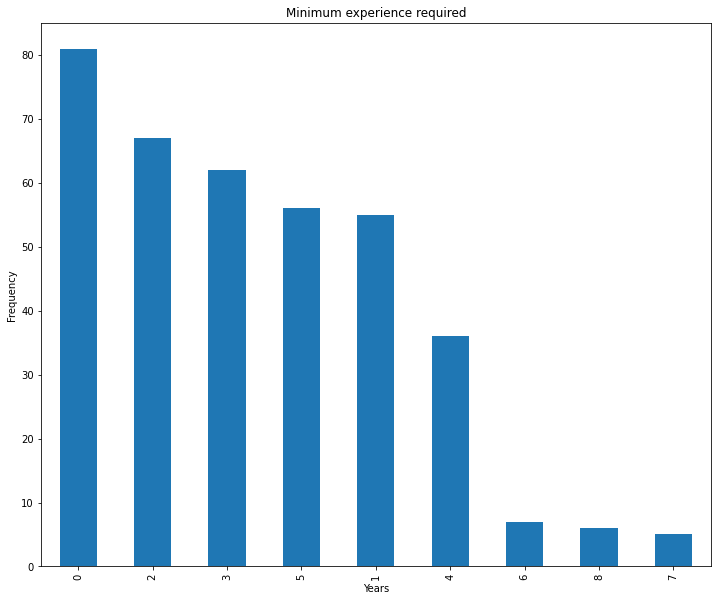

In [157]:
#visualizing the distribution of the minimum experience
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
plt.title('Minimum experience required')
df['min_experience'].value_counts().plot(kind = 'bar')
plt.xlabel('Years')
plt.ylabel('Frequency')


In [159]:
#saving the dataset
df.to_csv("Job_offers.csv")

In this short project the website with python job offers was scraped and transformed into CSV file so that it can be used now for further analysis.